In [2]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
real_data = pd.read_csv('synthetic_grid_data.csv')
real_data

,Time,Node_1_Power_Flow,Node_1_Voltage,Node_2_Power_Flow,Node_2_Voltage,Node_3_Power_Flow,Node_3_Voltage,Node_4_Power_Flow,Node_4_Voltage
0,0,66.304318,225.627781,41.595348,235.224251,48.447575,231.529888,44.314432,223.141458
1,1,35.240682,229.513166,59.638680,238.872733,78.286936,233.881745,44.395339,226.808154
2,2,70.495178,221.468751,61.162308,226.221405,55.061265,231.337512,57.458579,223.550548
3,3,78.742208,239.606236,26.317047,232.722345,99.756012,226.136081,19.371956,226.601499
4,4,10.356698,235.295432,21.297722,233.131492,86.862874,226.597462,86.653895,222.138934
5,5,44.334885,226.139932,55.392984,221.751021,21.684814,238.040067,42.310619,233.738963
6,6,74.428602,239.425827,36.828537,239.643043,40.984058,236.054054,66.185055,230.114909
7,7,12.558023,220.103698,87.818488,225.372439,66.073398,238.845990,23.600246,228.822408
8,8,18.219126,235.841055,69.971915,232.679971,23.645396,222.470808,44.215967,226.714683
9,9,13.598993,238.731803,81.794422,230.819969,59.501968,227.950219,87.803245,224.313981


In [4]:
# Jaa tiedot ominaisuuksiin (X) ja kohdemuuttujaan (y)
X = real_data.drop('Node_1_Power_Flow', axis=1)  # Korvaa 'kohde_sarake' todellisen kohdesarakkeen nimellä
y = real_data['Node_1_Power_Flow']

# Luo synteettinen datasetti samalla määrällä näytteitä ja ominaisuuksia

synthetic_data, synthetic_labels = make_classification(
    n_samples=len(real_data),
    n_features=X.shape[1],
    n_informative=int(X.shape[1] * 0.8),  # Säädä informatiivisuutta tarpeen mukaan
    random_state=42,
)

# Jaa synteettiset tiedot koulutus- ja testisetteihin
X_train, X_test, y_train, y_test = train_test_split(synthetic_data, synthetic_labels, test_size=0.2, random_state=42)

In [5]:
# Kouluta luokittelija synteettisillä tiedoilla
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Arvioi luokittelijan tarkkuus todellisilla tiedoilla nähdäksesi, kuinka hyvin synteettiset tiedot suoriutuvat
accuracy = clf.score(X_test, y_test)
print(f"Accuracy on real data: {accuracy:.2f}")

Accuracy on real data: 0.60


Visualization

/Users/apple/Desktop/synteettinen _data/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/apple/Desktop/synteettinen _data/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/apple/Desktop/synteettinen _data/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/apple/Desktop/synteettinen _data/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

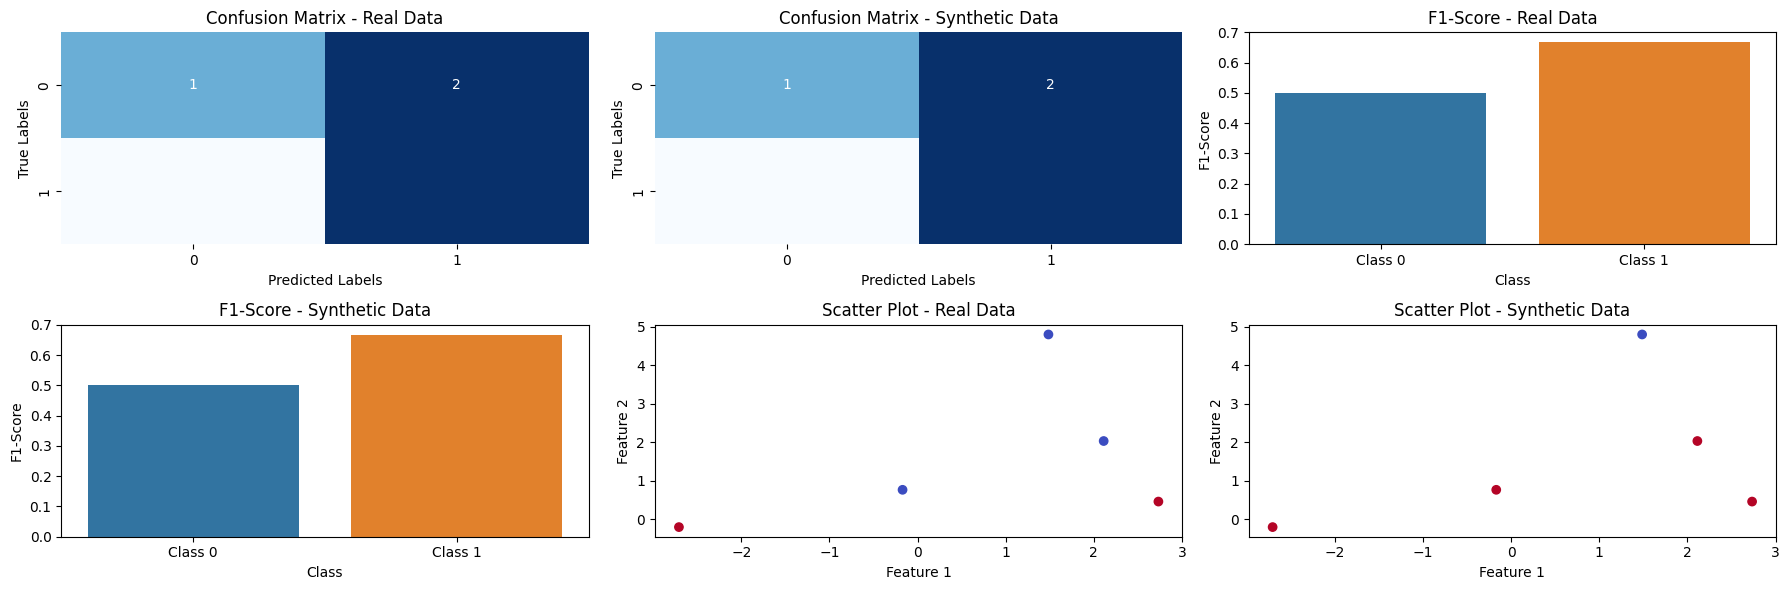

In [6]:
# Arvioi luokittelija todellisilla tiedoilla
real_data_predictions = clf.predict(X_test)
real_data_cm = confusion_matrix(y_test, real_data_predictions)

# Arvioi luokittelija synteettisillä tiedoilla
synthetic_data_predictions = clf.predict(X_test)
synthetic_data_cm = confusion_matrix(y_test, synthetic_data_predictions)

# Luo yksi kuvaaja alikuvilla
plt.figure(figsize=(18, 6))

# Alikuva 1: Sekoitusmatriisi - Todelliset tiedot
plt.subplot(2, 3, 1)
sns.heatmap(real_data_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Real Data')

# Alikuva 2: Sekoitusmatriisi - Synteettiset tiedot
plt.subplot(2, 3, 2)
sns.heatmap(synthetic_data_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Synthetic Data')

# Alikuva 3: Pylväskaavio F1-pistemäärästä - Todelliset tiedot
plt.subplot(2, 3, 3)
real_data_report = classification_report(y_test, real_data_predictions, output_dict=True)
sns.barplot(x=['Class 0', 'Class 1'], y=[real_data_report['0']['f1-score'], real_data_report['1']['f1-score']])
plt.title('F1-Score - Real Data')
plt.ylabel('F1-Score')
plt.xlabel('Class')

# Alikuva 4: Pylväskaavio F1-pistemäärästä - Synteettiset tiedot
plt.subplot(2, 3, 4)
synthetic_data_report = classification_report(y_test, synthetic_data_predictions, output_dict=True)
sns.barplot(x=['Class 0', 'Class 1'], y=[synthetic_data_report['0']['f1-score'], synthetic_data_report['1']['f1-score']])
plt.title('F1-Score - Synthetic Data')
plt.ylabel('F1-Score')
plt.xlabel('Class')

# Alikuva 5: Hajontakaavio - Todelliset tiedot
plt.subplot(2, 3, 5)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot - Real Data')

# Alikuva 6: Hajontakaavio - Synteettiset tiedot
plt.subplot(2, 3, 6)
plt.scatter(X_test[:, 0], X_test[:, 1], c=synthetic_data_predictions, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot - Synthetic Data')

plt.tight_layout()
plt.show()

